In [8]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

In [9]:
train_modified = pd.read_pickle("./train_modified.pkl")
test_modified = pd.read_pickle("./test_modified.pkl")

## Machine learning models

The distinction between the training set, validation set, and the test set is fundamentally important to applying machine learning methods in practice. Evaluating more than one model on the test set and choesing the better of the two will result in a overly optimistic estimate of how accurate the model is.

split the training data into training+validation set and test set

In [10]:
X = train_modified.drop("Category", axis=1)
y = train_modified["Category"]
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

split train+validation set into training and validation set

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

### Decision Trees 

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [13]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [14]:
print("Train accuracy:" + str(np.round(tree.score(X_train, y_train),2)))
print("Validation accuracy:" +  str(np.round(tree.score(X_valid, y_valid),2)))

Train accuracy:0.9
Validation accuracy:0.22


As we can see, the deafault setting of fully developing the tree causes overfitting!!

#### Exploring max_depth

Let's try to set max_deph. It's a pre-pruning method, which will stop developing the tree before we perfectly fit to the training data.

In [15]:
tree_scores = {}
tree_scores['max_depth'] = []
tree_scores['Train accuracy'] = []
tree_scores['Validation accuracy'] = []
for max_depht in np.arange(1,16,1):
    tree = DecisionTreeClassifier(max_depth=max_depht, random_state=0)
    tree.fit(X_train, y_train)
    tree_scores['max_depth'].append(max_depht)
    tree_scores['Train accuracy'].append(tree.score(X_train, y_train))
    tree_scores['Validation accuracy'].append(tree.score(X_valid, y_valid))


In [16]:
my_df = pd.DataFrame(tree_scores)
my_df

,max_depth,Train accuracy,Validation accuracy
0,1,0.203231,0.203384
1,2,0.217450,0.217324
2,3,0.220598,0.220216
3,4,0.226851,0.227019
4,5,0.235215,0.235547
5,6,0.244085,0.243546
6,7,0.252601,0.252044
7,8,0.260163,0.258725
8,9,0.266684,0.262516
9,10,0.274322,0.267095


As we can see, in this case the best value for max_depth hyperparameter is 13. However, both training and validation accuracy aren't high..

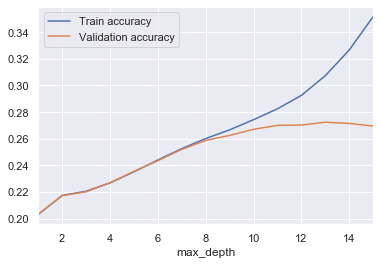

In [17]:
my_df.plot(x='max_depth')

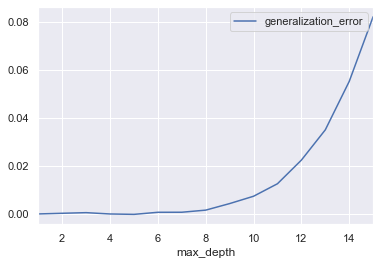

In [18]:
my_df['generalization_error'] = my_df['Train accuracy'] - my_df['Validation accuracy']
my_df[['generalization_error','max_depth']].plot(x='max_depth')

 #### Exploring min_samples_split

Let's try to set min_samples_split. It is the minimum number of samples required to split an internal node

In [19]:
tree_scores = {}
tree_scores['min_samples_split'] = []
tree_scores['Train accuracy'] = []
tree_scores['Validation accuracy'] = []
for min_samples_split in np.arange(10,800,20):
    tree = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=0)
    tree.fit(X_train, y_train)
    tree_scores['min_samples_split'].append(min_samples_split)
    tree_scores['Train accuracy'].append(tree.score(X_train, y_train))
    tree_scores['Validation accuracy'].append(tree.score(X_valid, y_valid))

In [20]:
my_df = pd.DataFrame(tree_scores)
my_df

,min_samples_split,Train accuracy,Validation accuracy
0,10,0.582640,0.225840
1,30,0.427540,0.248065
2,50,0.382483,0.258622
3,70,0.359430,0.264423
4,90,0.345560,0.268250
5,110,0.335836,0.270612
6,130,0.328486,0.272210
7,150,0.323026,0.274020
8,170,0.318636,0.275101
9,190,0.314842,0.275399


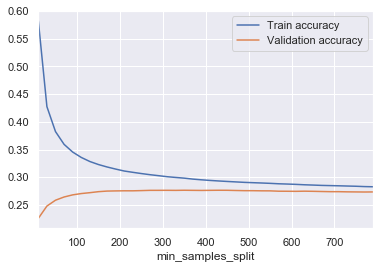

In [21]:
my_df.plot(x='min_samples_split')

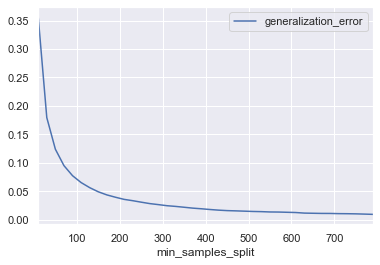

In [22]:
my_df['generalization_error'] = my_df['Train accuracy'] - my_df['Validation accuracy']
my_df[['generalization_error','min_samples_split']].plot(x='min_samples_split')

#### Exploring min_samples_leaf

Let's try to set min_samples_leaf, that represents the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

In [23]:
tree_scores = {}
tree_scores['min_samples_leaf'] = []
tree_scores['Train accuracy'] = []
tree_scores['Validation accuracy'] = []
for min_samples_leaf in np.arange(2,35,1):
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=0)
    tree.fit(X_train, y_train)
    tree_scores["min_samples_leaf"].append(min_samples_leaf)
    tree_scores['Train accuracy'].append(tree.score(X_train, y_train))
    tree_scores['Validation accuracy'].append(tree.score(X_valid, y_valid))

In [24]:
my_df = pd.DataFrame(tree_scores)
my_df

,min_samples_leaf,Train accuracy,Validation accuracy
0,2,0.695263,0.220653
1,3,0.613197,0.224832
2,4,0.559386,0.227669
3,5,0.520864,0.230754
4,6,0.492142,0.235522
5,7,0.470186,0.238359
6,8,0.452715,0.240855
7,9,0.438464,0.243650
8,10,0.426672,0.246517
9,11,0.417058,0.248430


Grid Search with Cross-validation

In [25]:
import numpy as np

In [26]:
param_grid = {'max_depth':[6, 12, 18], 'min_samples_split':[100, 300, 500, 700], 'min_samples_leaf':[10, 20, 30, 40, 50]}

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [28]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Validation set score:{:.2f}".format(grid_search.score(X_valid, y_valid)))

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Validation set score:0.28


In [29]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.075325,0.031211,0.085834,0.005228,6,10,100,"{'max_depth': 6, 'min_samples_leaf': 10, 'min_...",0.243641,0.242347,...,0.243085,0.001236,56,0.245198,0.242325,0.243875,0.243322,0.244582,0.243861,0.000996
1,2.177821,0.072347,0.088098,0.006122,6,10,300,"{'max_depth': 6, 'min_samples_leaf': 10, 'min_...",0.243641,0.242378,...,0.243091,0.001233,41,0.245198,0.242290,0.243875,0.243322,0.244582,0.243854,0.001007
2,2.226948,0.112706,0.089797,0.014708,6,10,500,"{'max_depth': 6, 'min_samples_leaf': 10, 'min_...",0.243631,0.242378,...,0.243089,0.001230,46,0.245183,0.242290,0.243855,0.243322,0.244562,0.243842,0.001000
3,2.600986,0.422526,0.096428,0.007747,6,10,700,"{'max_depth': 6, 'min_samples_leaf': 10, 'min_...",0.243631,0.242378,...,0.243089,0.001230,46,0.245183,0.242277,0.243855,0.243322,0.244562,0.243840,0.001004
4,2.448567,0.179432,0.112645,0.033823,6,20,100,"{'max_depth': 6, 'min_samples_leaf': 20, 'min_...",0.243641,0.242347,...,0.243085,0.001236,56,0.245198,0.242312,0.243875,0.243322,0.244582,0.243858,0.001000


In [30]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=18,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [31]:
tree = DecisionTreeClassifier(max_depth=18, min_samples_leaf=30, min_samples_split=300, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(tree.score(X_train, y_train)))
print("Accuracy on validation set: {:.2f}".format(tree.score(X_valid, y_valid)))

Accuracy on training set: 0.30
Accuracy on validation set: 0.28


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier (n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(forest.score(X_train, y_train)))
print("Accuracy on validation set: {:.2f}".format(forest.score(X_valid, y_valid)))

Accuracy on training set: 0.90
Accuracy on validation set: 0.30


How we can see, the algorithm tend to overfit.
Let's try to tune the hyperparameters

In [33]:
from sklearn.model_selection import validation_curve

In [34]:
num_est = [100, 300, 500, 750, 800]

In [35]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = num_est, cv = 3)

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


MemoryError: could not allocate 163577856 bytes